In [28]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [17]:
# Combine the different csv files for the data companies into one dataframe
filenames = glob.glob("data"+"/*.csv")
dfs = []
for filename in filenames:
    idf = pd.read_csv(filename)
    ticker = os.path.splitext(os.path.basename(filename))[0]
    idf['ticker'] = ticker
    dfs.append(idf)
df = pd.concat(dfs, ignore_index=True)    

In [24]:
# Check the headings of the table to see it's correct
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459939,552160000,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447999,477131200,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490865,447610800,AAPL


In [27]:
# see key information for each ticker and check for any anomaly
df.groupby('ticker').describe()

Open                                                                \
         count         mean          std         min         25%         50%   
ticker                                                                         
AAPL    2999.0    41.741022    36.499461    6.870357   18.432500   28.132500   
AMZN    2999.0  1049.629670  1026.616700  105.930000  256.959992  577.090027   
BABA    1812.0   155.196231    60.340433   57.299999   94.814998  165.940002   
CRM     2999.0    96.149860    69.242415   15.522500   39.373750   72.620003   
FB      2399.0   142.953135    87.436744   18.080000   75.180000  133.500000   
GOOG    2999.0   854.399036   609.822856  218.336624  368.959549  701.619995   
INTC    2998.0    36.187091    13.161824   17.879999   24.129999   33.899999   
MSFT    2999.0    84.238056    73.481126   23.090000   30.825000   50.900002   
NVDA    2999.0    37.434253    54.111006    2.180000    3.890000    7.552500   
TSLA    2876.0   116.410741   212.854015    3.228000   13.547500   46.028999   

                                    High               ...    Adj Close  \
                75%          max   count         mean  ...          75%   
ticker                                                 ...                
AAPL      47.771250   161.679993  2999.0    42.170738  ...    46.150312   
AMZN    1737.849976  3744.000000  2999.0  1060.558695  ...  1735.780029   
BABA     194.612503   313.500000  1812.0   156.948235  ...   194.739998   
CRM      146.070000   310.000000  2999.0    97.284537  ...   145.715004   
FB       187.199997   381.679993  2399.0   144.619516  ...   187.485001   
GOOG    1130.574951  3020.000000  2999.0   862.291979  ...  1132.005005   
INTC      48.147501    68.199997  2998.0    36.571107  ...    45.017702   
MSFT     108.970001   344.619995  2999.0    85.012144  ...   104.826973   
NVDA      51.372501   335.170013  2999.0    38.034479  ...    51.161249   
TSLA      66.030001  1234.410034  2876.0   118.895201  ...    66.256498   

                     Volume                                          \
                max   count          mean           std         min   
ticker                                                                
AAPL     165.300003  2999.0  2.714256e+08  2.263473e+08  41000000.0   
AMZN    3731.409912  2999.0  4.478774e+06  2.718589e+06    881300.0   
BABA     317.140015  1812.0  1.775227e+07  1.070150e+07   3775300.0   
CRM      309.959991  2999.0  6.847148e+06  5.112357e+06   1084700.0   
FB       382.179993  2399.0  3.062396e+07  2.527313e+07   5913100.0   
GOOG    3014.179932  2999.0  3.026443e+06  2.597949e+06      7922.0   
INTC      66.938637  2998.0  3.584200e+07  2.177456e+07   5893800.0   
MSFT     343.109985  2999.0  3.865017e+07  2.205586e+07   7425600.0   
NVDA     333.760010  2999.0  5.050944e+07  3.328182e+07   4564400.0   
TSLA    1229.910034  2876.0  3.143162e+07  2.830797e+07    592500.0   

                                                             
                25%          50%          75%           max  
ticker                                                       
AAPL    109804350.0  185859200.0  372465800.0  1.880998e+09  
AMZN      2815350.0    3784600.0    5279300.0  4.242110e+07  
BABA     11335750.0   15125050.0   20648800.0  1.418300e+08  
CRM       3974500.0    5397600.0    8085500.0  6.456280e+07  
FB       15664750.0   22205200.0   35675900.0  3.654579e+08  
GOOG      1342950.0    1991200.0    4098003.0  2.976073e+07  
INTC     21512275.0   29030050.0   43870950.0  1.990026e+08  
MSFT     23915200.0   32834000.0   48327450.0  3.193179e+08  
NVDA     29299600.0   41630800.0   62138000.0  3.692928e+08  
TSLA     12683400.0   24956500.0   40088875.0  3.046940e+08  

[10 rows x 48 columns]

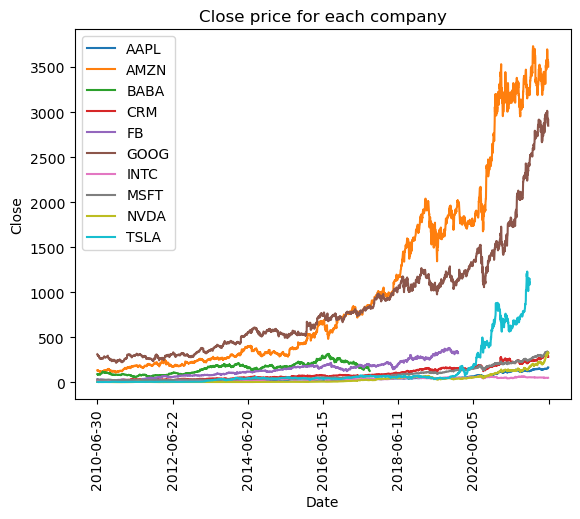

In [35]:
grouped_ticker = df.groupby('ticker')
fig, ax = plt.subplots()
for name, group in grouped_ticker:
    group.plot(x='Date', y='Close', ax=ax, label=name)

plt.xlabel('Date')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.ylabel('Close')
plt.title('Close price for each company')
plt.legend(loc='best')
plt.show()